In [101]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
#read the csv file
df = pd.read_csv('census.csv')

In [103]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [105]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [106]:
#more than 50k income
morethan50k = len(df[df['income'] == '>50K'])
#income <=50k
less_or_equal_50k = len(df[df['income'] == '<=50K'])

In [107]:
morethan50k

11208

In [108]:
less_or_equal_50k

34014

(array([7308., 8226., 8704., 8811., 5716., 3609., 2000.,  579.,  192.,
          77.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

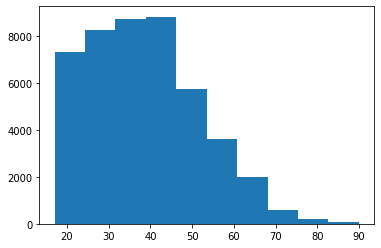

In [109]:
plt.hist(df['age'])

(array([4.3082e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1000e+01, 2.4000e+01, 8.2000e+02, 1.2850e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

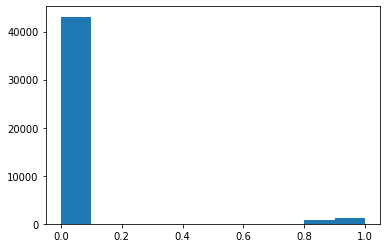

In [118]:
plt.hist(df['capital-loss'])

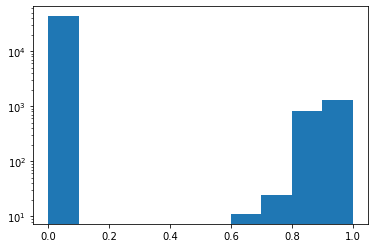

In [119]:
plt.hist(df['capital-loss'])
plt.yscale('log')

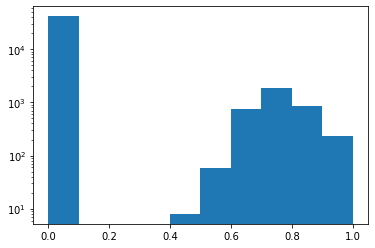

In [120]:
plt.hist(df['capital-gain'])
plt.yscale('log')

In [121]:
#log transform
skewed = ['capital-gain' , 'capital-loss']
df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

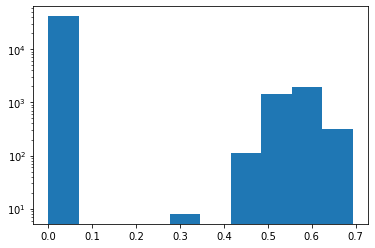

In [122]:
plt.hist(df['capital-gain'])
plt.yscale('log')

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [124]:
numerical_features = ['age' , 'education-num' , 'capital-gain' , 'capital-loss' , 'hours-per-week']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [125]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.73768,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [126]:
X = df.drop('income' , axis= 1)
y = df['income']

In [127]:
features = pd.get_dummies(X)

In [128]:
y = y.apply(lambda X: 1 if X == '>50K' else 0)

In [129]:
encode = list(features.columns)

In [130]:
len(encode)

103

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features , y , test_size = 0.25 , random_state = 0)

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\AhmedPC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_pred = lr.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix , classification_report

In [136]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[7884,  683],
       [1100, 1639]], dtype=int64)

In [137]:
cr = classification_report(y_test , y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.88      0.92      0.90      8567\n           1       0.71      0.60      0.65      2739\n\n    accuracy                           0.84     11306\n   macro avg       0.79      0.76      0.77     11306\nweighted avg       0.84      0.84      0.84     11306\n'